# Précisions
N'oubliez pas d'aller consulter les ressources sur les fonctions existentes de pandas, numpy et seaborn qui vous seront utiles lorsque vous réponderez aux questions qui suivent. Voici les sites web concernés à consulter pour les plus récentes versions de chacunes des librairies scientifiques:
* Pandas: [documentation](https://pandas.pydata.org/docs/)
* Numpy: [documentation](https://numpy.org/doc/1.21/)
* Matplotlib: [quelques fonctions plot() pertinentes](https://matplotlib.org/3.5.0/plot_types/index.html)
* Seaborn: [introduction à seaborn](https://seaborn.pydata.org/introduction.html)

Tout au long du TP, vous pouvez cliquer sur les liens bleus qui vous mèneront vers des ressources encore plus spécifiques pour réaliser chacune des questions.

# Partie 1: Exploration de la base de données

In [110]:
#Différents 'imports' nécessaires pour ce TP
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,6] 
plt.style.use('fivethirtyeight')

## 1.1 Visualisation des données

Nous allons travailler avec un fichier .csv (comma separated values), qui contient les 'Happiness score', soit les indicateurs de bonheur de l'année 2020 pour 153 pays du monde. Ces pays sont organisés sur les rangées du Dataframe 'df', une structure de données tabulaire de la librairie pandas. Des paramètres additionnels sont disponibles sur chaque colonnes, qui incluent notamment l'indicateur régional ('Region'), le support social ('Social Support'), le logarithme du produit intérieur brut par capita ('Logged GDP per capita') et plusieurs autres. Il faut en premier visualiser les données en notre possession. Pour ce faire, rouler le code qui suit. 

In [ ]:
#Trouve le chemin relatif pour accéder aux données par la suite
path = os.getcwd()

df = pd.read_csv(os.path.join(path, '2020.csv'))

#Précision mise à 2 chiffres après la virgule
pd.set_option("display.precision", 2)

#df.head(x) permet d'afficher les x premières rangées de données, cette fonction vous sera utile pour la suite des choses
#lors de la visualisation de la banque de données modifiée, utilisez la fonction display() au lieu de print() dans le 
#jupyter notebook pour un meilleur affichage
display(df.head(15))
# df.describe()

#La commande ci-dessous vous donne de l'information sur la base de données (dataset), la quantité de valeurs et le type
#de variable utilisée (dtypes, à droite complètement ex:float64 et object est un string)
df.info()
print('\n')
#Pour retrouver un élément de la case 'Country name'
print(f"Le premier élément de la colonne Country name est : {df['Country name'][0]}")

#Nous pouvons aussi retrouver le nombre de régions en utilisant la ligne de code suivante:
df['Region'].value_counts()

## Question 1.
Pour cette question, vous devez retourner les valeurs maximales de 'Happiness score' pour chacune des 10 régions ('Region'). Ainsi la fonction ci-dessous doit retourner un dictionnaire avec ces scores maximaux en ordre décroissant et leurs pays associés en tant que clé. Par exemple: Australia:7.3, Israel:7.21, etc. N'oubliez pas que vous avez accès aux librairies de pandas et numpy qui possèdent plein d'outils pour automatiser un processus de ce genre!

### 1.1 
Vous devez en premier lieu créer une fonction simple qui retourne une base de données de la région voulue, soit celle donnée en paramètre à la fonction CreateSubsetPerRegion(). Un exemple de ce qui doit être retourné est présenté ci-dessous:
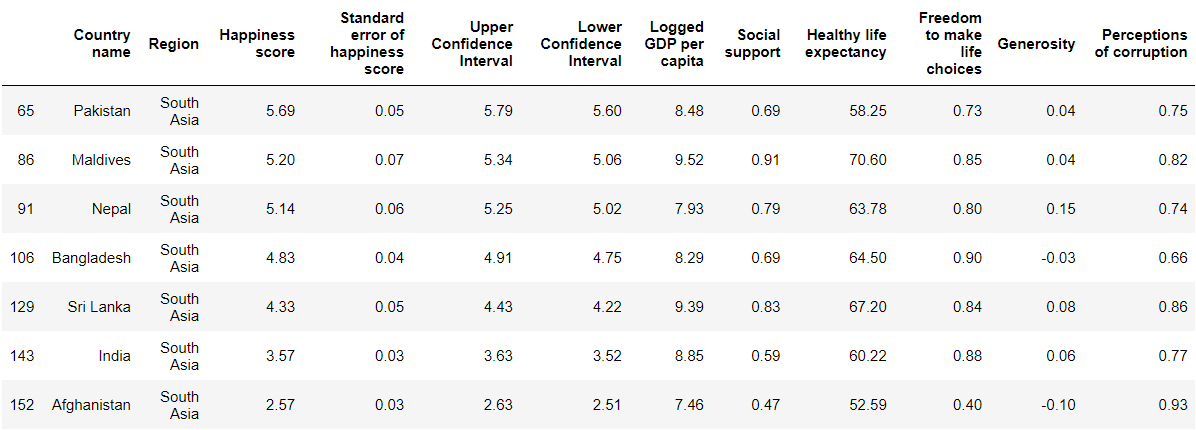

In [108]:
def CreateSubsetPerRegion(df, region):
    #TODO Extraire les sous-données par région à l'aide du dataframe pandas ('subset' de données)
    regionTry = df[df["Region"] == region]
    lenght = len(df.columns)
    
    return (regionTry.head(lenght))

path = os.getcwd()
df = pd.read_csv(os.path.join(path, '2020.csv'))
display(CreateSubsetPerRegion(df,'East Asia'))
display(CreateSubsetPerRegion(df,'Central and Eastern Europe'))

,Country name,Region,Happiness score,Standard error of happiness score,Upper Confidence Interval,Lower Confidence Interval,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
24,Taiwan,East Asia,6.4554,0.039140,6.532114,6.378686,10.775685,0.894309,69.599998,0.771530,-0.073199,0.731883
60,South Korea,East Asia,5.8724,0.044085,5.958807,5.785993,10.510567,0.799387,73.602730,0.612965,-0.043404,0.789067
61,Japan,East Asia,5.8708,0.041392,5.951928,5.789672,10.579689,0.883546,75.000969,0.809961,-0.246910,0.654558
77,Hong Kong S.A.R. of China,East Asia,5.5104,0.046019,5.600597,5.420203,10.934671,0.845969,76.771706,0.779834,0.134980,0.420607
80,Mongolia,East Asia,5.4562,0.040313,5.535214,5.377186,9.412187,0.937142,62.304485,0.693351,0.098094,0.863511
93,China,East Asia,5.1239,0.025902,5.174667,5.073133,9.688568,0.798761,69.289192,0.898518,-0.181426,0.753971


,Country name,Region,Happiness score,Standard error of happiness score,Upper Confidence Interval,Lower Confidence Interval,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,Czech Republic,Central and Eastern Europe,6.9109,0.042891,6.994967,6.826833,10.404163,0.914431,70.047935,0.818537,-0.230862,0.858446
32,Slovenia,Central and Eastern Europe,6.3634,0.043841,6.449329,6.277471,10.392323,0.939576,71.102989,0.936143,-0.080603,0.817071
34,Kosovo,Central and Eastern Europe,6.3252,0.052216,6.427544,6.222856,9.204430,0.820727,63.885555,0.861536,0.190934,0.922328
36,Slovakia,Central and Eastern Europe,6.2806,0.038898,6.356839,6.204361,10.347750,0.922494,68.906342,0.749953,-0.124409,0.918096
40,Lithuania,Central and Eastern Europe,6.2155,0.044193,6.302118,6.128881,10.343626,0.926107,67.294075,0.747381,-0.219725,0.809584
42,Poland,Central and Eastern Europe,6.1863,0.035500,6.255880,6.116719,10.265124,0.874257,69.311134,0.862056,-0.205084,0.686927
46,Romania,Central and Eastern Europe,6.1237,0.047433,6.216668,6.030732,10.107584,0.825162,67.207237,0.842823,-0.197815,0.934300
50,Estonia,Central and Eastern Europe,6.0218,0.035985,6.092331,5.951269,10.340017,0.934730,68.604958,0.877709,-0.111698,0.623074
52,Hungary,Central and Eastern Europe,6.0004,0.039473,6.077767,5.923033,10.249244,0.921934,67.609970,0.718965,-0.194323,0.892917
56,Latvia,Central and Eastern Europe,5.9500,0.034838,6.018282,5.881717,10.175320,0.918289,66.807465,0.671238,-0.186889,0.795580


### 1.2
Il faut maintenant retourner le dictionnaire ordonné en ordre décroissant du pays associé à la valeur maximale par région tel qu'indiqué dans la question 1. À nouveau, n'oubliez pas que vous avez accès à des librairies qui automatisent ces processus plus facilement. 

In [107]:
def ClassMaxScorePerRegion(df):
    #TODO Trouver les régions pour en faire une liste (https://numpy.org/doc/stable/reference/generated/numpy.unique.html)
    #regionListe = np.array(df["Region"])
    regionListe = []
    for region in np.array(df["Region"]):
        if region not in regionListe:
            regionListe.append(region)

    #TODO Pour chacune des régions, trouves les valeurs maximales et le pays associé
    # #TODO Création d'un dictionnaire en ordre décroissant des valeurs de 'Happiness score'   
    dictHappiness = {}
    countryList = df.to_numpy()
    for region in regionListe:
        maxValeur = 0
        for country in countryList:
            if region == (country[1]):
                if (country[2]) > maxValeur:
                    newCountry = country[0]
                    maxValeur = country[2]
                    dictHappiness[newCountry] = maxValeur

    sorted_dictHappines = {k: v for k, v in sorted(dictHappiness.items(), key=lambda item: item[1])}
    return sorted_dictHappines   
path = os.getcwd()
df = pd.read_csv(os.path.join(path, '2020.csv'))
print(ClassMaxScorePerRegion(df))

{'Pakistan': 5.69329977, 'Mauritius': 6.101299763, 'Uzbekistan': 6.257599831, 'Singapore': 6.377099991, 'Taiwan': 6.45539999, 'Czech Republic': 6.910900116, 'Costa Rica': 7.121399879, 'Israel': 7.128600121, 'New Zealand': 7.299600124, 'Finland': 7.808700085}


## Question 2
Nous allons maintenant rajouter les données de 2016 afin de les comparer à celles de 2020. Tout d'abord, utilisez ImportNewData() pour importer cette nouvelle base de données nommée 2016.csv. Avec les pays ayant obtenu les scores maximaux de 'Happiness score' par région, le but est de tracer leur évolution entre 2016 à 2020. L'évolution doit être représentée de la plus petite différence à la plus grande. Pour ce faire, vous allez en premier lieu trouver les différences avec la fonction FindDifferences() qui retourne un dictionnaire en ordre croissant de ces différences. Par la suite, vous tracerez ces différences par pays. Voici un exemple de graphique à barre voulu à réaliser avec la fonction PlotComparison(), ce ne sont pas nécessairement les pays voulus. Vous pouvez vous renseigner sur la fonction [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) de matplotlib.
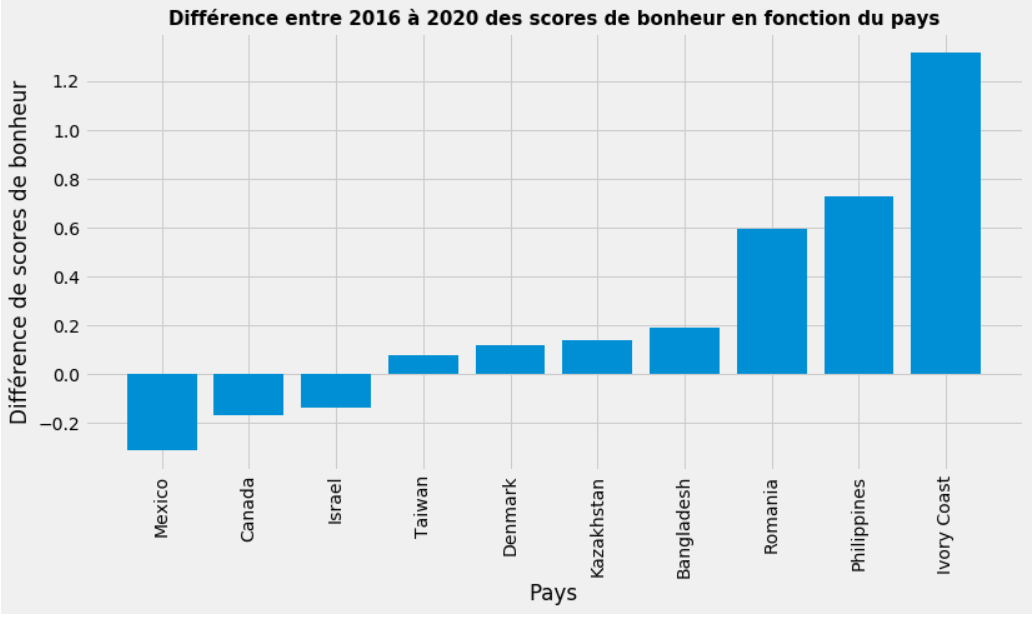

### 2.1
Importation des données de l'année 2016

In [106]:
def ImportNewData():
    #TODO Import de la base de données pour 2016
    #TODO Afficher les 10 premières rangées de la base de données de 2016
    path = os.getcwd()
    df = pd.read_csv(os.path.join(path, '2016.csv'))
    df_2016 = display(df.head(10)) #############  à demandé  ############
    
    return df_2016
    
df_2016 = ImportNewData()

,Country name,Region,Happiness score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,7.526,7.460,7.592,1.44178,1.16374,79.504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,7.509,7.428,7.590,1.52733,1.14524,86.303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,7.501,7.333,7.669,1.42666,1.18326,86.733,0.56624,0.14975,0.47678
3,Norway,Western Europe,7.498,7.421,7.575,1.57744,1.12690,79.579,0.59609,0.35776,0.37895
4,Finland,Western Europe,7.413,7.351,7.475,1.40598,1.13464,81.091,0.57104,0.41004,0.25492
5,Canada,North America,7.404,7.335,7.473,1.44015,1.09610,82.760,0.57370,0.31329,0.44834
6,Netherlands,Western Europe,7.339,7.284,7.394,1.46468,1.02912,81.231,0.55211,0.29927,0.47416
7,New Zealand,Australia and New Zealand,7.334,7.264,7.404,1.36066,1.17278,83.096,0.58147,0.41904,0.49401
8,Australia,Australia and New Zealand,7.313,7.241,7.385,1.44443,1.10476,85.120,0.56837,0.32331,0.47407
9,Sweden,Western Europe,7.291,7.227,7.355,1.45181,1.08764,83.121,0.58218,0.40867,0.38254


### 2.2
Implémentation des fonctions pour illustrer les différences pour les 10 pays concernés entre 2016 et 2020

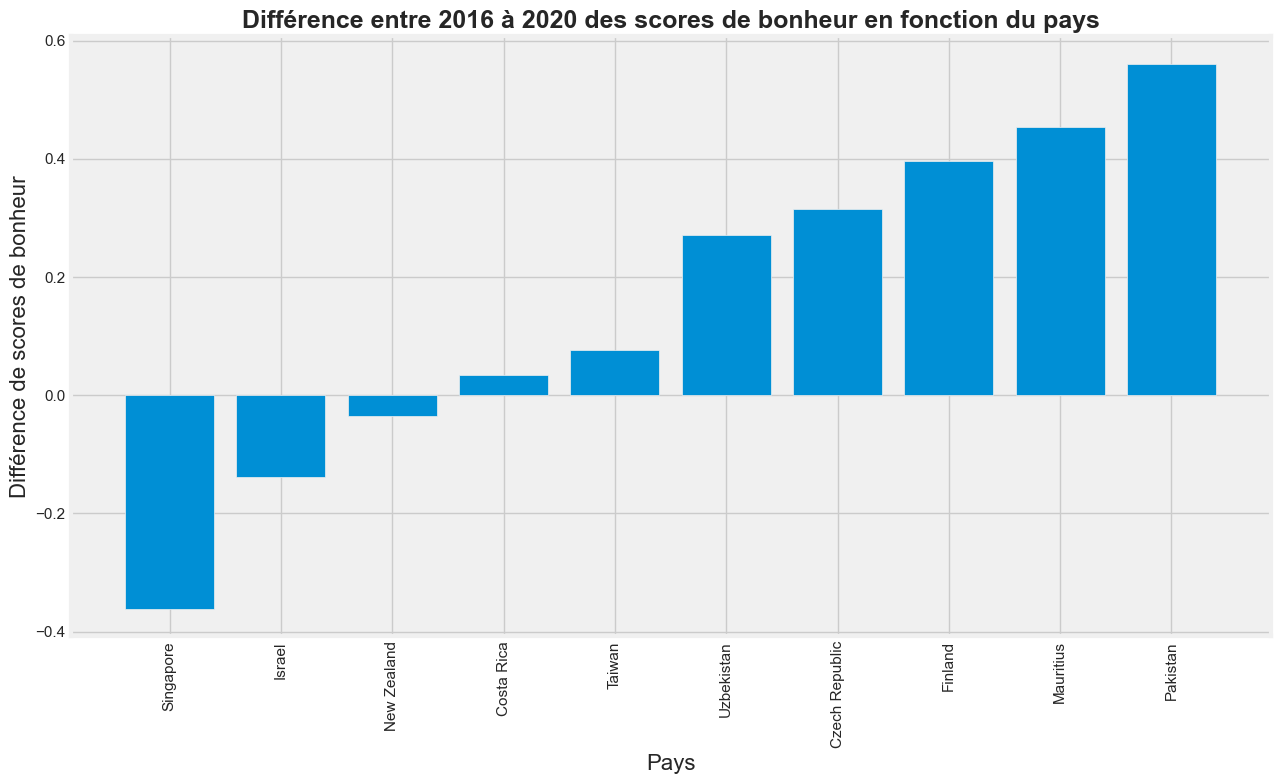

In [117]:
def FindDifferences(df_1,df_2):
    #TODO Reprendre les valeurs obtenues précédemment du pays avec le score maximal par région
    #TODO Retourner un dictionnaire des différences en ordre croissant
    dictPays = {}
    maxPays2020 = ClassMaxScorePerRegion(df_1)
    lesPays2016 = df_2.to_numpy()
    for i in range (len(lesPays2016)):
        for pays in maxPays2020:
            if pays == lesPays2016[i][0]:
                difference = maxPays2020[pays] - lesPays2016[i][2]
                dictPays[pays] = difference
    sorted_dict = {k: v for k, v in sorted(dictPays.items(), key=lambda item: item[1])} 
        
    return sorted_dict
def PlotComparison(sorted_dict):
#TODO Faire un bar plot de ces différences
    keysList = list(sorted_dict.keys())
    valuesList = list(sorted_dict.values())  
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    pays = keysList
    bonheur = valuesList
    ax.bar(pays,bonheur)
    plt.xticks(rotation='vertical')
    plt.xlabel("Pays",size=16)
    plt.ylabel("Différence de scores de bonheur", size=16)
    plt.title("Différence entre 2016 à 2020 des scores de bonheur en fonction du pays",fontweight="bold", size=18)
    plt.show()
df = pd.read_csv(os.path.join(path, '2020.csv'))
df_2016 = pd.read_csv(os.path.join(path, '2016.csv'))   
sorted_dict = FindDifferences(df, df_2016)
PlotComparison(sorted_dict)

## Question 3
Seaborn est une librairie qui permet de plus facilement tracer des graphiques complexes. Souvent, des [subplot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) via matplotlib sont utilisés afin d'afficher plusieurs graphiques dans la même figure à des fins de comparaisons. Nous nous intéresserons maintenant à deux paramètres particuliers:
1. Healthy life expectancy
2. Happiness score

Vous devez comparer pour les deux années 2016 et 2020 ces deux paramètres. Pour le premier paramètre, vous utiliserez [sns.displot](https://seaborn.pydata.org/generated/seaborn.distplot.html) et pour le second paramètre, vous ferez usage des fonctionnalités de pandas pour le traçage avec [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). Voici un exemple d'affichage:
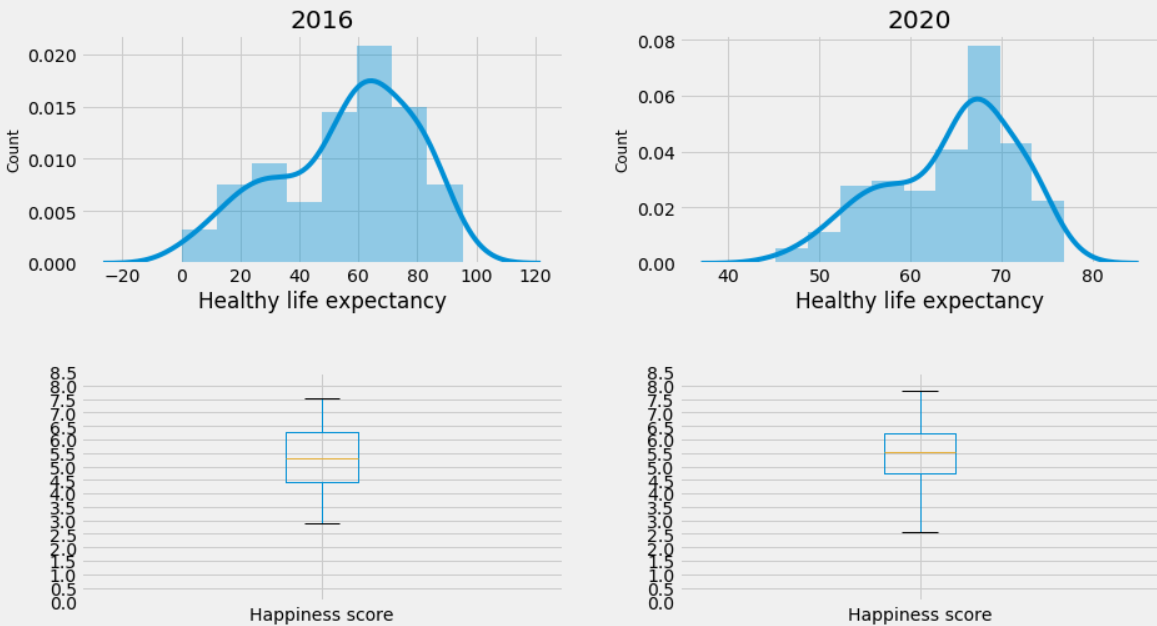

c:\Users\iremy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\iremy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


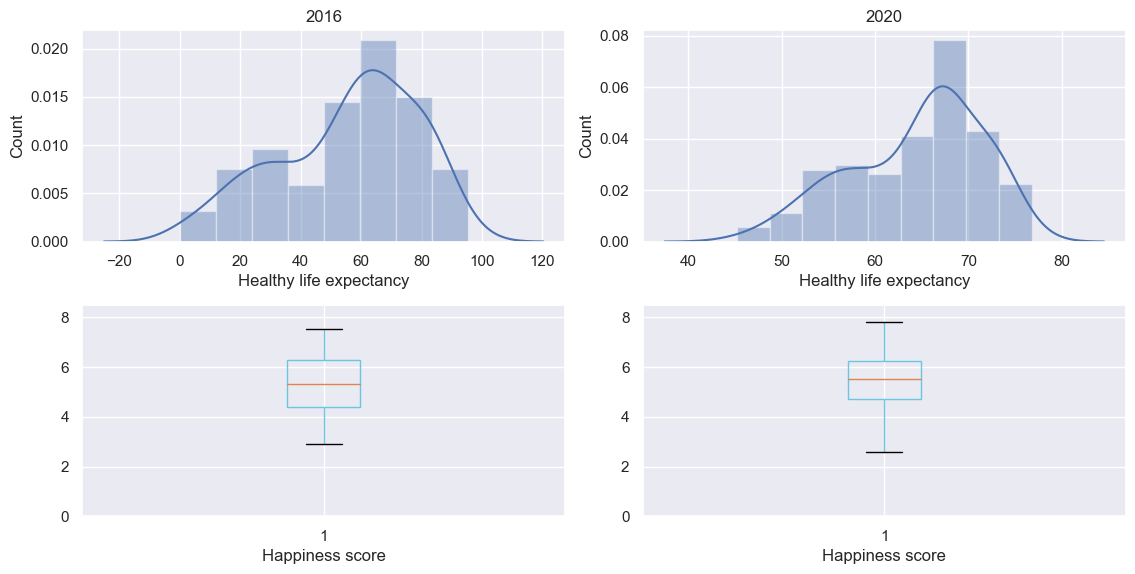

In [104]:
def PlotDistributions(df_1, df_2):      
#TODO Utiliser sns.displot et df.boxplot pour visualiser les deux paramètres demandés
    #Le premier graphique de Health life expectancy:
    figure, axis = plt.subplots(2, 2)
    figure.subplots_adjust(hspace=0.3, wspace=0.16)
    hLE1 = sns.distplot(df_1['Healthy life expectancy'], ax = axis[0,0])
    axis[0, 0].set_title("2016")
    axis[0,0].set_ylabel('Count', size=12)
    axis[0,0].set_xlabel('Healthy life expectancy')
    #Le deuxieme graphique de Health life expectancy:
    hLE2 = sns.distplot(df_2['Healthy life expectancy'], ax = axis[0,1])
    axis[0, 1].set_title("2020")
    axis[0,1].set_ylabel('Count', size=12)
    axis[0,1].set_xlabel('Healthy life expectancy')
 

    bp0 = axis[1,0].boxplot([df_1['Happiness score']], patch_artist=True)
    axis[1,0].set_xlabel('Happiness score')
    for box in bp0['boxes']:
        box.set(color='#6bc6e0', linewidth=1)
        box.set(facecolor = '#FFFFFF00' )

    for whisker in bp0['whiskers']: 
        whisker.set(color ='#6bc6e0', linewidth = 1) 
    axis[1,0].set_ylim(0.0, 8.5)
    bp1 = axis[1,1].boxplot([df_2['Happiness score']], patch_artist=True)
    axis[1,1].set_xlabel('Happiness score')
    for box in bp1['boxes']:
        box.set(color='#6bc6e0', linewidth=1)
        box.set(facecolor = '#FFFFFF00' )

    for whisker in bp1['whiskers']: 
        whisker.set(color ='#6bc6e0', linewidth = 1) 
    axis[1,1].set_ylim(0.0, 8.5)
    plt.show()



df = pd.read_csv("2020.csv")
df_2016 = pd.read_csv("2016.csv")
# df = pd.read_csv(os.path.join(path, '2020.csv'))
# df_2016 = pd.read_csv(os.path.join(path, '2016.csv'))  
PlotDistributions(df_2016, df)

## Question 4
En se concentrant maintenant à nouveau sur les données de **2020**, nous allons essayer de trouver le paramètre le plus corrélé avec le score de bonheur 'Happiness score'. Nous allons prendre des paramètres spécifiques à analyser:
1. Happiness score
2. Logged GDP per capita
3. Social support
4. Healthy life expectancy
5. Freedom to make life choices
6. Generosity
7. Perceptions of corruption

Utilisez un [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) afin de visualiser ces [corrélations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). Votre heatmap de corrélation devrait ressembler à ce qui est présenté ci-dessous. Attention, ce qui est affiché n'est pas exactement ce que vous allez obtenir puisque ce ne sont pas les même données utilisées. L'exemple n'est qu'indicatif pour la ressemblance visuelle à obtenir.
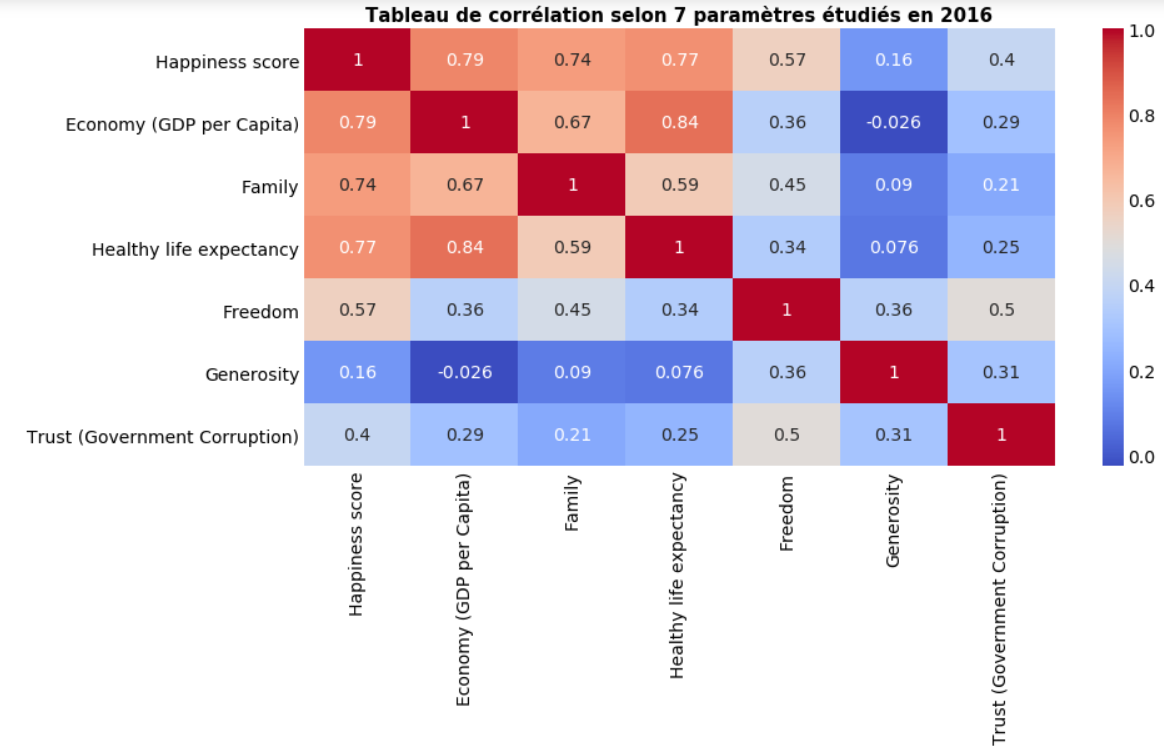

Pour ce faire, vous allez écrire la fonction FindCorrelations(). En plus d'afficher le heatmap, cette fonction retourne la valeur maximale de corrélation avec le score de bonheur en considérant un paramètre différent de lui-même. En effet, comme vous pouvez le voir à la figure ci-haut le paramètre 'Happiness score' est toujours corrélé à 100% avec lui-même. Nous nous intéresserons donc plutôt à la deuxième valeur de corrélation la plus élevée et le paramètre qui lui est associé. L'affichage final ressemble à ceci et le coefficient de corrélation doit être arrondi au centième près:


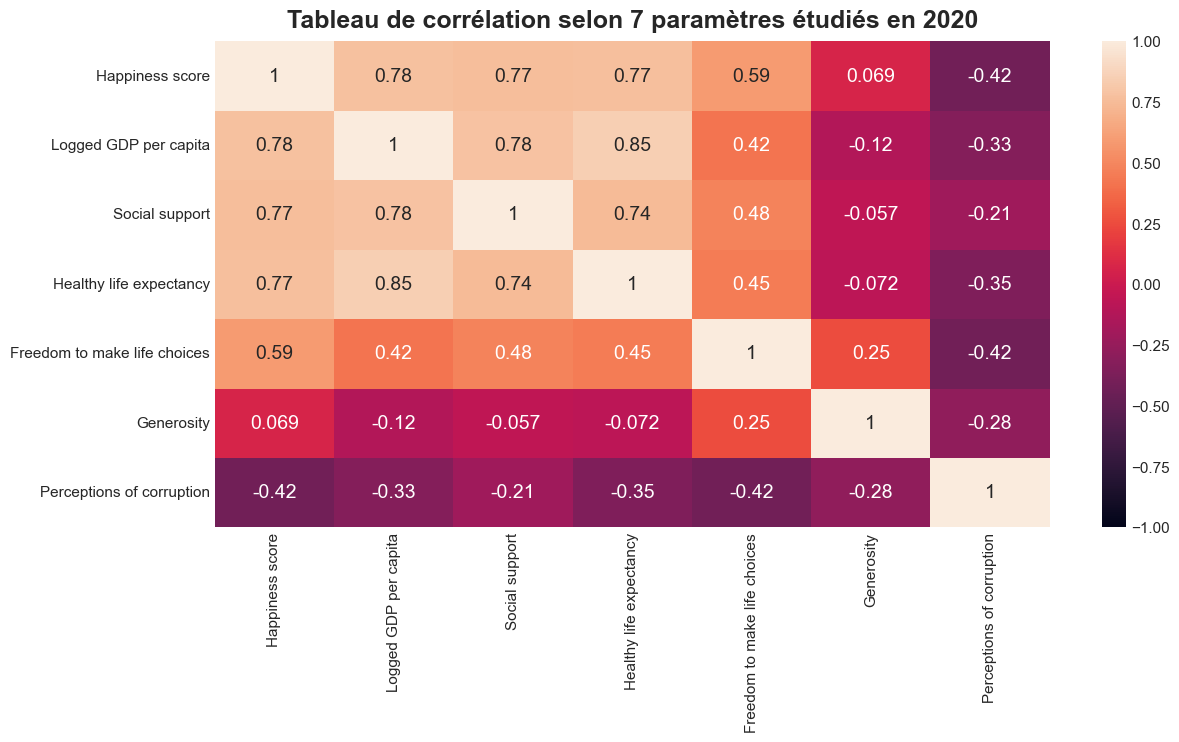

Le paramètre avec un coefficient de corrélation le plus élévé avec Happiness score est Logged GDP per capita avec 0.78


In [115]:
# Réajuste le fond d'affichage à blanc
matplotlib.rcParams['figure.facecolor'] = 'w'
def FindCorrelations(df):
    #TODO Sélectionner les 7 paramètres à étudier
    #TODO Faire et afficher un heatmap des facteurs de corrélation
    data = {
        'Happiness score':                 df['Happiness score'],
        'Logged GDP per capita':          df['Logged GDP per capita'],
        'Social support':                  df['Social support'],
        'Healthy life expectancy':         df['Healthy life expectancy'],
        'Freedom to make life choices':    df['Freedom to make life choices'],
        'Generosity':                      df['Generosity'],
        'Perceptions of corruption':       df['Perceptions of corruption'],
    }
    dataKeys = list(data.keys())
    dataFrame = pd.DataFrame(data)
    dfCorr = dataFrame.corr()
    max = 0
    for i in range (len(dfCorr.values[0])):
        if dfCorr.values[0][i] > max and dfCorr.values[0][i] != 1:
           max = dfCorr.values[0][i]
           place = i
    param = dataKeys[place]
    chosen_max_cor = float("{:.2f}".format(max))
    heatmap = sns.heatmap(dfCorr, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Tableau de corrélation selon 7 paramètres étudiés en 2020', fontdict={'fontsize':18},fontweight="bold", pad=10)
    plt.show()
    return chosen_max_cor, param

df = pd.read_csv("2020.csv")   
chosen_max_cor, param = FindCorrelations(df)
#TODO Afficher la phrase indiquant le coefficient de corrélation le plus élevé avec le paramètre 'Happiness score'
affichage = f'Le paramètre avec un coefficient de corrélation le plus élévé avec Happiness score est {param} avec {chosen_max_cor}'
print(affichage)

## Tests à rouler
La cellule ci-dessous vous permet de tester certaines questions lorsqu'il s'agissait de retourner un print ou bien des dictionnaires en valeurs de retour. Les affichage de graphiques ainsi que les Dataframes retournés ne seront pas testés.

In [118]:
import unittest
import os
import sys
class TestQ1(unittest.TestCase):
    result = {'Finland': 7.808700085, 'New Zealand': 7.2996001239999995, 'Israel': 7.128600121, 'Costa Rica': 7.121399879, 'Czech Republic': 6.9109001160000005, 'Taiwan': 6.45539999, 'Singapore': 6.377099991000001, 'Uzbekistan': 6.257599831, 'Mauritius': 6.101299762999999, 'Pakistan': 5.69329977}

    def test1_real_value(self):
        for key in self.result: 
            self.assertAlmostEqual(ClassMaxScorePerRegion(df)[key], self.result[key], delta=0.1)


class TestQ2(unittest.TestCase):
    def test2_find_differences(self):
        sorted_val = {'Singapore': -0.3619000089999993, 'Israel': -0.1383998790000005, 'New Zealand': -0.03439987600000016, 'Costa Rica': 0.03439987899999952, 'Taiwan': 0.07639999000000053, 'Uzbekistan': 0.2705998310000002, 'Czech Republic': 0.31490011600000045, 'Finland': 0.39570008500000053, 'Mauritius': 0.4532997629999995, 'Pakistan': 0.5612997699999998}
        for key in sorted_val: 
            self.assertAlmostEqual(FindDifferences(df, df_2016)[key], sorted_val[key], delta=0.1)

class TestQ4(unittest.TestCase):
     def test41_find_correlations(self):
        wanted = 'Le paramètre avec un coefficient de corrélation le plus élévé avec Happiness score est Logged GDP per capita avec 0.78'
        self.assertEqual(affichage, wanted)
        
res = unittest.main(argv=[''], verbosity=3, exit=False)
# if we want our notebook to stop processing due to failures, we need a cell itself to fail
assert len(res.result.failures) == 0

test1_real_value (__main__.TestQ1) ... ok
test2_find_differences (__main__.TestQ2) ... ok
test41_find_correlations (__main__.TestQ4) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.018s

OK


## Suite...
Rendez-vous à la partie 3 que vous pouvez retrouver dans le fichier tests.py du github et dont les instructions sont dans le readme.